In [1]:
from cosmic.sample.initialbinarytable import InitialBinaryTable
from cosmic.evolve import Evolve
from cosmic.utils import convert_kstar_evol_type
from cosmic.plotting import evolve_and_plot

import numpy as np
import matplotlib.pyplot as plt
import tqdm

In [2]:
# Helper functions and variables for unit conversions

def aui_to_porb(aui, m_tot):
    # aui: a list of values, initial separation in AU
    # m_tot: a list of values, total mass in M_sun
    # result: a list of values, orbital period in given condition in days
    res = []
    for i in range(len(aui)):
        res.append((1/m_tot[i]**0.5) * (aui[i]**1.5) * 365)
    return res

# Used to convert separation in R_sun into AU
unit_factor = 1 / 215.032

# Helper function: given an array of data and an array of target,
# return an array of index that is nearest to the target value.
import math 
def findNearestList(data, targetList):
    res = []
    for num in targetList:
        res.append(findNearest(data, num))
    return res

def findNearest(data, target):
    n = len(data)
    res = -1
    minDiff = 10**5
    for i in range(n):
        if data[i] == 10**(-5):
            continue
        if abs(target - data[i]) <= minDiff:
            res = i
            minDiff = abs(target - data[i])
    return res

In [3]:
# Default BSEDict
BSEDict = {'xi': 1.0, 'bhflag': 1, 'neta': 0.5, 'windflag': 3, 'wdflag': 1, 'alpha1': 1.0, 'pts1': 0.001, 
           'pts3': 0.02, 'pts2': 0.01, 'epsnov': 0.001, 'hewind': 0.5, 'ck': 1000, 'bwind': 0.0, 'lambdaf': 0.0, 
           'mxns': 3.0, 'beta': -1.0, 'tflag': 1, 'acc2': 1.5, 'grflag' : 1, 'remnantflag': 4, 'ceflag': 0, 
           'eddfac': 1.0, 'ifflag': 0, 'bconst': 3000, 'sigma': 265.0, 'gamma': -2.0, 'pisn': 45.0, 
           'natal_kick_array' : [[-100.0,-100.0,-100.0,-100.0,0.0], [-100.0,-100.0,-100.0,-100.0,0.0]], 
           'bhsigmafrac' : 1.0, 'polar_kick_angle' : 90, 
           'qcrit_array' : [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0], 
           'cekickflag' : 2, 'cehestarflag' : 0, 'cemergeflag' : 0, 'ecsn' : 2.25, 'ecsn_mlow' : 1.6, 
           'aic' : 1, 'ussn' : 0, 'sigmadiv' :-20.0, 'qcflag' : 1, 'eddlimflag' : 0, 
           'fprimc_array' : [2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0], 
           'bhspinflag' : 0, 'bhspinmag' : 0.0, 'rejuv_fac' : 1.0, 'rejuvflag' : 0, 'htpmb' : 1, 'ST_cr' : 1, 
           'ST_tide' : 1, 'bdecayfac' : 1, 'rembar_massloss' : 0.5, 'kickflag' : 0, 'zsun' : 0.014, 'bhms_coll_flag' : 0, 
           'don_lim' : -1, 'acc_lim' : -1, 'rtmsflag' : 0, 'wd_mass_lim': 1}

In [4]:
NUM_DICT = 2000
NUM_SEP = 400

MASS_1 = 7
MASS_2 = 1
MASS_TOT = MASS_1 + MASS_2

ECC = 0

SEP_START = 2
SEP_END = 8

LAMBDA_START = -100
LAMBDA_END = 0

SOLAR_MET = 0.02

TPHYS_LIM = 200

In [5]:
# List of initial conditions for simulation later

m1_list = [MASS_1 for i in range(NUM_SEP)]
m2_list = [MASS_2 for i in range(NUM_SEP)]
mtot_list = [MASS_TOT for i in range(NUM_SEP)]
ai_list = np.linspace(SEP_START, SEP_END, NUM_SEP)
porb_i_list = aui_to_porb(ai_list, mtot_list)

ecc_list = [ECC for i in range(NUM_SEP)]
tphysf_list = [TPHYS_LIM for i in range(NUM_SEP)]
kstar1_list = [1 for i in range(NUM_SEP)]
kstar2_list = [1 for i in range(NUM_SEP)]
metallicity_list = [SOLAR_MET for i in range(NUM_SEP)] # solar metallicity

## $\alpha_{\mathrm{CE}} = 1.0$

In [6]:
# Create a list of BSEDict for different lambdaf values
# lambdaf ranges from 0 to -10 with NUM_DICT values in between

lambdaList = np.linspace(LAMBDA_START, LAMBDA_END, NUM_DICT, endpoint=False)
print(lambdaList)

BSEDictList = [BSEDict.copy() for i in range(NUM_DICT)]
for i in range(NUM_DICT):
    BSEDictList[i]['lambdaf'] = lambdaList[i]

[-1.000e+02 -9.995e+01 -9.990e+01 ... -1.500e-01 -1.000e-01 -5.000e-02]


In [7]:
# List of initial conditions for simulation later

m1_list = [MASS_1 for i in range(NUM_SEP)]
m2_list = [MASS_2 for i in range(NUM_SEP)]
mtot_list = [MASS_TOT for i in range(NUM_SEP)]
ai_list = np.linspace(SEP_START, SEP_END, NUM_SEP)
porb_i_list = aui_to_porb(ai_list, mtot_list)

ecc_list = [ECC for i in range(NUM_SEP)]
tphysf_list = [TPHYS_LIM for i in range(NUM_SEP)]
kstar1_list = [1 for i in range(NUM_SEP)]
kstar2_list = [1 for i in range(NUM_SEP)]
metallicity_list = [SOLAR_MET for i in range(NUM_SEP)] # solar metallicity

In [8]:
single = InitialBinaryTable.InitialBinaries(m1=m1_list[:50], m2=m2_list[:50], 
                                                porb=porb_i_list[:50], ecc=ecc_list[:50], 
                                                tphysf=tphysf_list[:50], kstar1=kstar1_list[:50], kstar2=kstar2_list[:50], 
                                                metallicity=metallicity_list[:50])

In [9]:
bpp, bcm, initC, kick_info = Evolve.evolve(initialbinarytable=single, BSEDict=BSEDictList[100])
bpp['sep in AU'] = bpp['sep'] * unit_factor
print(bpp[['tphys', 'mass_1', 'mass_2', 'kstar_1', 'kstar_2', 'sep in AU', 'evol_type']])

         tphys    mass_1    mass_2  kstar_1  kstar_2  sep in AU  evol_type
0     0.000000  7.000000  1.000000      1.0      1.0   1.998361        1.0
0    48.459967  6.944129  1.000000      2.0      1.0   2.012416        2.0
0    48.617920  6.943478  1.000001      3.0      1.0   2.010125        2.0
0    48.659382  6.942771  1.000007      3.0      1.0   1.486459        3.0
0    48.659382  6.942771  1.000007      3.0      1.0   1.486459        7.0
..         ...       ...       ...      ...      ...        ...        ...
49   60.762927  1.262329  1.000530      8.0      1.0   0.999941        3.0
49   60.762927  1.262329  1.000530      8.0      1.0   0.999941        7.0
49   60.762927  0.860643  1.000530     11.0      1.0   0.969852        8.0
49   60.762927  0.860643  1.000530     11.0      1.0   0.969852        4.0
49  200.000000  0.860643  1.000530     11.0      1.0   0.969852       10.0

[650 rows x 7 columns]


In [10]:
binary_set = InitialBinaryTable.InitialBinaries(m1=m1_list, m2=m2_list, 
                                                porb=porb_i_list, ecc=ecc_list, 
                                                tphysf=tphysf_list, kstar1=kstar1_list, kstar2=kstar2_list, 
                                                metallicity=metallicity_list)

In [11]:
data1 = np.zeros((NUM_DICT,NUM_SEP)) # 2D-list to store results and ready to plot
count = 0
count1 = 0

for i in tqdm.tqdm(range(NUM_DICT)):
    # loop through the index of lambdaf
    bpp, bcm, initC, kick_info = Evolve.evolve(initialbinarytable=binary_set, BSEDict=BSEDictList[i], nproc = 36)
    bpp['sep in AU'] = bpp['sep'] * unit_factor
    for j in range(NUM_SEP):
        single_bpp = bpp.loc[j]

        cond1 = (single_bpp['evol_type'] == 8) # Select evol type to be common envelope ends
        cond2 = (single_bpp['kstar_1'] <= 12) 
        cond3 = (single_bpp['kstar_1'] >= 10) # Select kstar_1 to be WD
        cond4 = (single_bpp['kstar_2'] <= 1)
        cond5 = (single_bpp['kstar_2'] >= 0) # Select kstar_2 to be MS

        specific_rows = single_bpp[(cond1) & (cond2) & (cond3) & (cond4) & (cond5)] # mask to select rows
        if len(specific_rows) == 0:
            data1[i][j] = 10**(-5)
        else:
            count1 += 1
            data1[i][j] = specific_rows.iloc[0]['sep in AU']
            star = specific_rows.iloc[0]['kstar_1']
            if len(single_bpp[(single_bpp['kstar_1'] < star) & (single_bpp['evol_type'] == 7)]) >= 2:
                count += 1
#                 print(count)
print(count)
print(count1)

100%|██████████| 2000/2000 [26:01<00:00,  1.28it/s]

669685
791441


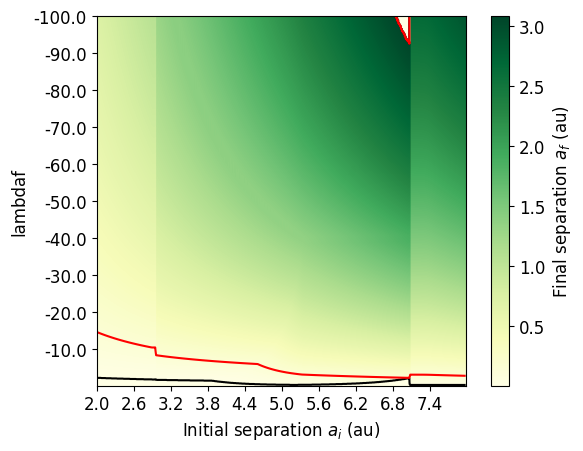

In [12]:
plt.imshow(data1, cmap='YlGn', aspect = 0.2)

cbar = plt.colorbar()  # Customize color bar label
cbar.ax.tick_params(labelsize=12)  # Adjust font size in color bar
cbar.ax.set_ylabel('Final separation $a_f$ (au)', fontsize=12)  # Add label to color bar
cbar.ax.figure.canvas.draw()

x_tick_locations = np.arange(0, data1.shape[1], 40)
y_tick_locations = np.arange(0, data1.shape[0], 200)
x_tick_labels = [f'{ai_list[i]:.1f}' for i in x_tick_locations]
y_tick_labels = [f'{lambdaList[i]:.1f}' for i in y_tick_locations]
plt.xticks(x_tick_locations, x_tick_labels, fontsize=12)
plt.yticks(y_tick_locations, y_tick_labels, fontsize=12)

plt.xlabel('Initial separation $a_i$ (au)', fontsize=12)  # Add X axis label
plt.ylabel('lambdaf', fontsize=12)  # Add Y axis label

plt.contour(data1, levels=[0.01, 0.15], colors=['black', 'red'])
plt.savefig('7+1 Heatmap, alpha = 1', dpi=300)
plt.show()

## $\alpha_{\mathrm{CE}} = 0.9$

In [13]:
# Create a list of BSEDict for different lambdaf values
# lambdaf ranges from 0 to -10 with NUM_DICT values in between

lambdaList = np.linspace(LAMBDA_START, LAMBDA_END, NUM_DICT, endpoint=False)
print(lambdaList)

BSEDictList = [BSEDict.copy() for i in range(NUM_DICT)]
for i in range(NUM_DICT):
    BSEDictList[i]['lambdaf'] = lambdaList[i]
    BSEDictList[i]['alpha1'] = 0.9

[-1.000e+02 -9.995e+01 -9.990e+01 ... -1.500e-01 -1.000e-01 -5.000e-02]


In [14]:
# List of initial conditions for simulation later

m1_list = [MASS_1 for i in range(NUM_SEP)]
m2_list = [MASS_2 for i in range(NUM_SEP)]
mtot_list = [MASS_TOT for i in range(NUM_SEP)]
ai_list = np.linspace(SEP_START, SEP_END, NUM_SEP)
porb_i_list = aui_to_porb(ai_list, mtot_list)

ecc_list = [ECC for i in range(NUM_SEP)]
tphysf_list = [TPHYS_LIM for i in range(NUM_SEP)]
kstar1_list = [1 for i in range(NUM_SEP)]
kstar2_list = [1 for i in range(NUM_SEP)]
metallicity_list = [SOLAR_MET for i in range(NUM_SEP)] # solar metallicity

In [15]:
binary_set = InitialBinaryTable.InitialBinaries(m1=m1_list, m2=m2_list, 
                                                porb=porb_i_list, ecc=ecc_list, 
                                                tphysf=tphysf_list, kstar1=kstar1_list, kstar2=kstar2_list, 
                                                metallicity=metallicity_list)

In [16]:
data2 = np.zeros((NUM_DICT,NUM_SEP)) # 2D-list to store results and ready to plot

count = 0
count1 = 0

for i in tqdm.tqdm(range(NUM_DICT)):
    # loop through the index of lambdaf
    bpp, bcm, initC, kick_info = Evolve.evolve(initialbinarytable=binary_set, BSEDict=BSEDictList[i], nproc = 36)
    bpp['sep in AU'] = bpp['sep'] * unit_factor
    for j in range(NUM_SEP):
        single_bpp = bpp.loc[j]

        cond1 = (single_bpp['evol_type'] == 8) # Select evol type to be common envelope ends
        cond2 = (single_bpp['kstar_1'] <= 12) 
        cond3 = (single_bpp['kstar_1'] >= 10) # Select kstar_1 to be WD
        cond4 = (single_bpp['kstar_2'] <= 1)
        cond5 = (single_bpp['kstar_2'] >= 0) # Select kstar_2 to be MS

        specific_rows = single_bpp[(cond1) & (cond2) & (cond3) & (cond4) & (cond5)] # mask to select rows
        if len(specific_rows) == 0:
            data2[i][j] = 10**(-5)
        else:
            count1 += 1
            data2[i][j] = specific_rows.iloc[0]['sep in AU']
            star = specific_rows.iloc[0]['kstar_1']
            if len(single_bpp[(single_bpp['kstar_1'] < star) & (single_bpp['evol_type'] == 7)]) >= 2:
                count += 1
print(count)
print(count1)

100%|██████████| 2000/2000 [26:23<00:00,  1.26it/s]

670190
791946


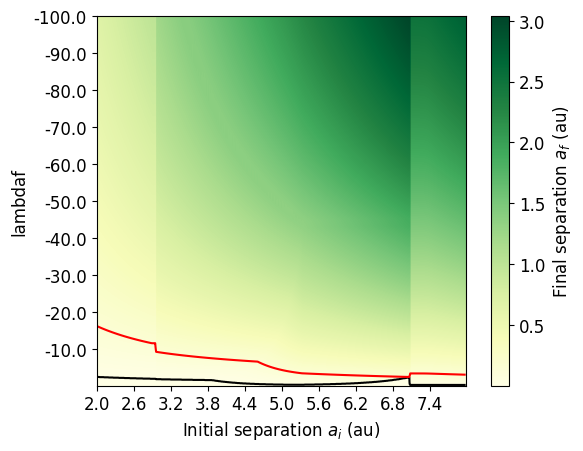

In [17]:
plt.imshow(data2, cmap='YlGn', aspect = 0.2)

cbar = plt.colorbar()  # Customize color bar label
cbar.ax.tick_params(labelsize=12)  # Adjust font size in color bar
cbar.ax.set_ylabel('Final separation $a_f$ (au)', fontsize=12)  # Add label to color bar
cbar.ax.figure.canvas.draw()

x_tick_locations = np.arange(0, data2.shape[1], 40)
y_tick_locations = np.arange(0, data2.shape[0], 200)
x_tick_labels = [f'{ai_list[i]:.1f}' for i in x_tick_locations]
y_tick_labels = [f'{lambdaList[i]:.1f}' for i in y_tick_locations]
plt.xticks(x_tick_locations, x_tick_labels, fontsize=12)
plt.yticks(y_tick_locations, y_tick_labels, fontsize=12)

plt.xlabel('Initial separation $a_i$ (au)', fontsize=12)  # Add X axis label
plt.ylabel('lambdaf', fontsize=12)  # Add Y axis label

plt.contour(data2, levels=[0.01, 0.15], colors=['black', 'red'])
plt.show()

## $\alpha_{\mathrm{CE}} = 0.6$

In [18]:
# Create a list of BSEDict for different lambdaf values
# lambdaf ranges from 0 to -10 with NUM_DICT values in between

lambdaList = np.linspace(LAMBDA_START, LAMBDA_END, NUM_DICT, endpoint=False)
print(lambdaList)

BSEDictList = [BSEDict.copy() for i in range(NUM_DICT)]
for i in range(NUM_DICT):
    BSEDictList[i]['lambdaf'] = lambdaList[i]
    BSEDictList[i]['alpha1'] = 0.6

[-1.000e+02 -9.995e+01 -9.990e+01 ... -1.500e-01 -1.000e-01 -5.000e-02]


In [19]:
# List of initial conditions for simulation later

m1_list = [MASS_1 for i in range(NUM_SEP)]
m2_list = [MASS_2 for i in range(NUM_SEP)]
mtot_list = [MASS_TOT for i in range(NUM_SEP)]
ai_list = np.linspace(SEP_START, SEP_END, NUM_SEP)
porb_i_list = aui_to_porb(ai_list, mtot_list)

ecc_list = [ECC for i in range(NUM_SEP)]
tphysf_list = [TPHYS_LIM for i in range(NUM_SEP)]
kstar1_list = [1 for i in range(NUM_SEP)]
kstar2_list = [1 for i in range(NUM_SEP)]
metallicity_list = [SOLAR_MET for i in range(NUM_SEP)] # solar metallicity

In [20]:
binary_set = InitialBinaryTable.InitialBinaries(m1=m1_list, m2=m2_list, 
                                                porb=porb_i_list, ecc=ecc_list, 
                                                tphysf=tphysf_list, kstar1=kstar1_list, kstar2=kstar2_list, 
                                                metallicity=metallicity_list)

In [21]:
data3 = np.zeros((NUM_DICT,NUM_SEP)) # 2D-list to store results and ready to plot

count = 0
count1 = 0

for i in tqdm.tqdm(range(NUM_DICT)):
    # loop through the index of lambdaf
    bpp, bcm, initC, kick_info = Evolve.evolve(initialbinarytable=binary_set, BSEDict=BSEDictList[i], nproc = 36)
    bpp['sep in AU'] = bpp['sep'] * unit_factor
    for j in range(NUM_SEP):
        single_bpp = bpp.loc[j]

        cond1 = (single_bpp['evol_type'] == 8) # Select evol type to be common envelope ends
        cond2 = (single_bpp['kstar_1'] <= 12) 
        cond3 = (single_bpp['kstar_1'] >= 10) # Select kstar_1 to be WD
        cond4 = (single_bpp['kstar_2'] <= 1)
        cond5 = (single_bpp['kstar_2'] >= 0) # Select kstar_2 to be MS

        specific_rows = single_bpp[(cond1) & (cond2) & (cond3) & (cond4) & (cond5)] # mask to select rows
        if len(specific_rows) == 0:
            data3[i][j] = 10**(-5)
        else:
            count1 += 1
            data3[i][j] = specific_rows.iloc[0]['sep in AU']
            star = specific_rows.iloc[0]['kstar_1']
            if len(single_bpp[(single_bpp['kstar_1'] < star) & (single_bpp['evol_type'] == 7)]) >= 2:
                count += 1
print(count)
print(count1)

100%|██████████| 2000/2000 [26:25<00:00,  1.26it/s]

666194
787786


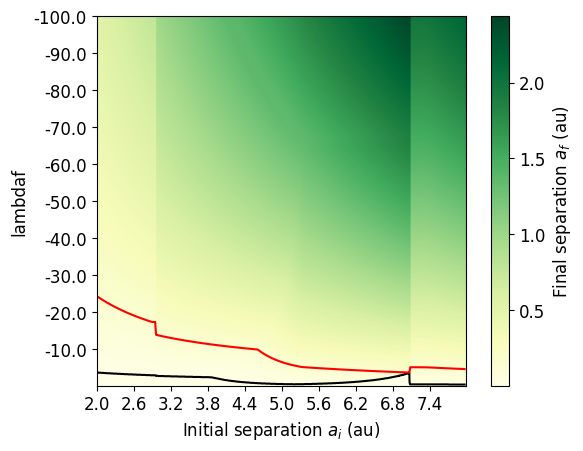

In [22]:
plt.imshow(data3, cmap='YlGn', aspect = 0.2)

cbar = plt.colorbar()  # Customize color bar label
cbar.ax.tick_params(labelsize=12)  # Adjust font size in color bar
cbar.ax.set_ylabel('Final separation $a_f$ (au)', fontsize=12)  # Add label to color bar
cbar.ax.figure.canvas.draw()

x_tick_locations = np.arange(0, data3.shape[1], 40)
y_tick_locations = np.arange(0, data3.shape[0], 200)
x_tick_labels = [f'{ai_list[i]:.1f}' for i in x_tick_locations]
y_tick_labels = [f'{lambdaList[i]:.1f}' for i in y_tick_locations]
plt.xticks(x_tick_locations, x_tick_labels, fontsize=12)
plt.yticks(y_tick_locations, y_tick_labels, fontsize=12)

plt.xlabel('Initial separation $a_i$ (au)', fontsize=12)  # Add X axis label
plt.ylabel('lambdaf', fontsize=12)  # Add Y axis label

plt.contour(data3, levels=[0.01, 0.15], colors=['black', 'red'])
plt.show()

## $\alpha_{\mathrm{CE}} = 0.3$

In [23]:
# Create a list of BSEDict for different lambdaf values
# lambdaf ranges from 0 to -10 with NUM_DICT values in between

lambdaList = np.linspace(LAMBDA_START, LAMBDA_END, NUM_DICT, endpoint=False)
print(lambdaList)

BSEDictList = [BSEDict.copy() for i in range(NUM_DICT)]
for i in range(NUM_DICT):
    BSEDictList[i]['lambdaf'] = lambdaList[i]
    BSEDictList[i]['alpha1'] = 0.3

[-1.000e+02 -9.995e+01 -9.990e+01 ... -1.500e-01 -1.000e-01 -5.000e-02]


In [24]:
# List of initial conditions for simulation later

m1_list = [MASS_1 for i in range(NUM_SEP)]
m2_list = [MASS_2 for i in range(NUM_SEP)]
mtot_list = [MASS_TOT for i in range(NUM_SEP)]
ai_list = np.linspace(SEP_START, SEP_END, NUM_SEP)
porb_i_list = aui_to_porb(ai_list, mtot_list)

ecc_list = [ECC for i in range(NUM_SEP)]
tphysf_list = [TPHYS_LIM for i in range(NUM_SEP)]
kstar1_list = [1 for i in range(NUM_SEP)]
kstar2_list = [1 for i in range(NUM_SEP)]
metallicity_list = [SOLAR_MET for i in range(NUM_SEP)] # solar metallicity

In [25]:
binary_set = InitialBinaryTable.InitialBinaries(m1=m1_list, m2=m2_list, 
                                                porb=porb_i_list, ecc=ecc_list, 
                                                tphysf=tphysf_list, kstar1=kstar1_list, kstar2=kstar2_list, 
                                                metallicity=metallicity_list)

In [26]:
data4 = np.zeros((NUM_DICT,NUM_SEP)) # 2D-list to store results and ready to plot

count = 0
count1 = 0

for i in tqdm.tqdm(range(NUM_DICT)):
    # loop through the index of lambdaf
    bpp, bcm, initC, kick_info = Evolve.evolve(initialbinarytable=binary_set, BSEDict=BSEDictList[i], nproc = 36)
    bpp['sep in AU'] = bpp['sep'] * unit_factor
    for j in range(NUM_SEP):
        single_bpp = bpp.loc[j]

        cond1 = (single_bpp['evol_type'] == 8) # Select evol type to be common envelope ends
        cond2 = (single_bpp['kstar_1'] <= 12) 
        cond3 = (single_bpp['kstar_1'] >= 10) # Select kstar_1 to be WD
        cond4 = (single_bpp['kstar_2'] <= 1)
        cond5 = (single_bpp['kstar_2'] >= 0) # Select kstar_2 to be MS

        specific_rows = single_bpp[(cond1) & (cond2) & (cond3) & (cond4) & (cond5)] # mask to select rows
        if len(specific_rows) == 0:
            data4[i][j] = 10**(-5)
        else:
            count1 += 1
            data4[i][j] = specific_rows.iloc[0]['sep in AU']
            star = specific_rows.iloc[0]['kstar_1']
            if len(single_bpp[(single_bpp['kstar_1'] < star) & (single_bpp['evol_type'] == 7)]) >= 2:
                count += 1
print(count)
print(count1)

100%|██████████| 2000/2000 [26:35<00:00,  1.25it/s]

654218
775383


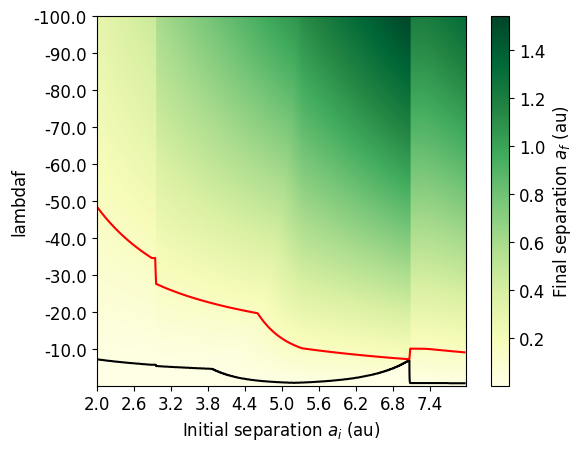

In [27]:
plt.imshow(data4, cmap='YlGn', aspect = 0.2)

cbar = plt.colorbar()  # Customize color bar label
cbar.ax.tick_params(labelsize=12)  # Adjust font size in color bar
cbar.ax.set_ylabel('Final separation $a_f$ (au)', fontsize=12)  # Add label to color bar
cbar.ax.figure.canvas.draw()

x_tick_locations = np.arange(0, data4.shape[1], 40)
y_tick_locations = np.arange(0, data4.shape[0], 200)
x_tick_labels = [f'{ai_list[i]:.1f}' for i in x_tick_locations]
y_tick_labels = [f'{lambdaList[i]:.1f}' for i in y_tick_locations]
plt.xticks(x_tick_locations, x_tick_labels, fontsize=12)
plt.yticks(y_tick_locations, y_tick_labels, fontsize=12)

plt.xlabel('Initial separation $a_i$ (au)', fontsize=12)  # Add X axis label
plt.ylabel('lambdaf', fontsize=12)  # Add Y axis label

plt.contour(data4, levels=[0.01, 0.15], colors=['black', 'red'])
plt.show()